In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Membaca dataset
wp = pd.read_csv('/content/world_population.csv')

## A1. Implementasikan metode Support Vector Classifier (dari SVM)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


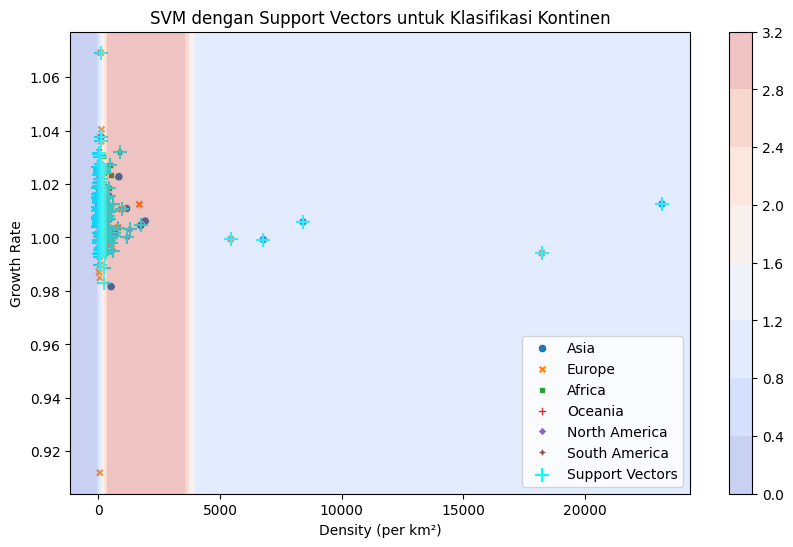

In [ ]:
# Pilih fitur dan target
X = wp[['Density (per km²)', 'Growth Rate']]  # Ambil 2 fitur
y = wp['Continent']  # Target klasifikasi

# Encoding target (Continent)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Bagi data (split) ke train set dan test set
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

# Buat objek classifier (model) SVM
svm = SVC(kernel="linear")
svm.fit(X_train, y_train)  # Latih classifier dengan data train

# Lakukan prediksi data test dengan model
y_pred = svm.predict(X_test)

# Simpan nilai Support Vectors & Indexnya
support_vectors = svm.support_vectors_
support_vector_indices = np.where(np.isin(X_train.values, support_vectors).all(axis=1))

# Plotting menggunakan Scatter dari Seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Density (per km²)', y='Growth Rate', hue=y, data=wp, style=y)

# Tampilkan Titik-Titik Support Vectors-nya
plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=100,
            color='cyan', marker='+', label='Support Vectors')

# Buat garis Decision Boundary (Ruang Keputusan)
ax = plt.gca()  # gca() = "Get Current Axes"
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Buat meshgrid untuk evaluasi model
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),  # 50 titik di sumbu x
                     np.linspace(ylim[0], ylim[1], 50))  # 50 titik di sumbu y

# Prediksi kelas untuk setiap titik di meshgrid
Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])  # Concatenate

# Reshape hasil prediksi agar sesuai dengan meshgrid
Z = Z.reshape(xx.shape)

# Buat grafik Decision Boundary dan garis Marginnya
contour = ax.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)  # Mewarnai area keputusan

# Tambahkan Label dan Legenda
plt.xlabel('Density (per km²)')
plt.ylabel('Growth Rate')
plt.legend(loc='lower right')
plt.title('SVM dengan Support Vectors untuk Klasifikasi Kontinen')
plt.colorbar(contour)  # Tambahkan colorbar
plt.show()


###  Hasil dari klasifikasi Support Vector Machine (SVM)
**1. Scatter Plot:**
- Setiap titik pada grafik mewakili satu data (misalnya, satu negara).
- Posisi titik pada sumbu x menunjukkan kepadatan penduduk (Density) negara tersebut.
- Posisi titik pada sumbu y menunjukkan tingkat pertumbuhan (Growth Rate) negara tersebut.
- Warna dan bentuk yang berbeda pada setiap titik merepresentasikan benua asal negara tersebut.

**2. Support Vectors:**
- Ditandai dengan simbol '+' berwarna cyan.
- Support vectors adalah titik data yang paling dekat dengan garis pemisah (hyperplane).
- Titik-titik ini sangat penting karena mereka memiliki pengaruh besar dalam menentukan posisi hyperplane yang optimal.

**3. Decision Boundary:**
- Garis atau daerah berwarna yang memisahkan data menjadi kelompok-kelompok yang berbeda (dalam hal ini, benua).
- Garis ini menunjukkan batas keputusan yang dibuat oleh model SVM untuk mengklasifikasikan data baru.

**4. Colorbar:**
- Skala warna yang menunjukkan kepadatan data di setiap wilayah pada plot.

## **A2. Hasil prediksi harus dievaluasi masing-masing:**

#### Klasifikasi

Confusion Matrix:
[[14  0  0  1  0  0]
 [14  0  0  5  0  0]
 [14  0  0  5  0  0]
 [ 5  0  0  2  0  0]
 [ 4  0  0  0  0  0]
 [ 7  0  0  0  0  0]]
Classification Report:
               precision    recall  f1-score   support

       Africa       0.24      0.93      0.38        15
         Asia       0.00      0.00      0.00        19
       Europe       0.00      0.00      0.00        19
North America       0.15      0.29      0.20         7
      Oceania       0.00      0.00      0.00         4
South America       0.00      0.00      0.00         7

     accuracy                           0.23        71
    macro avg       0.07      0.20      0.10        71
 weighted avg       0.07      0.23      0.10        71



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


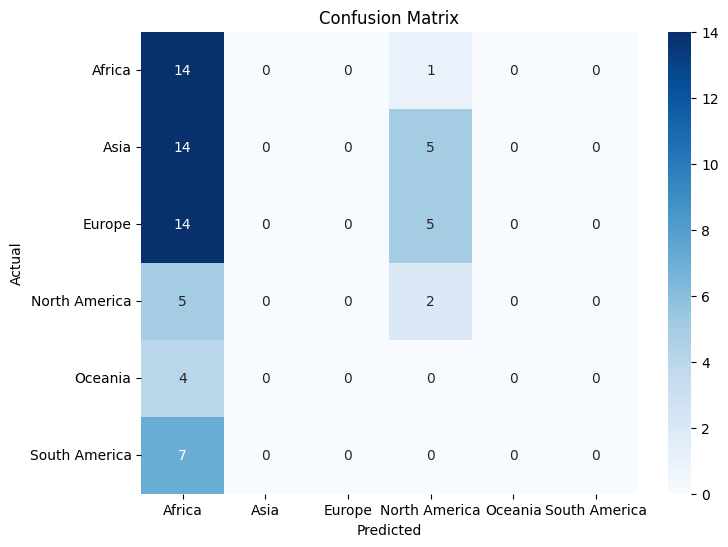

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# Hitung Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Hitung Classification Report
report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)
print("Classification Report:")
print(report)

# Optional: Visualisasi Confusion Matrix
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


### Klasifikasi
Berdasarkan Confusion Matrix yang ditampilkan, model klasifikasi yang diprediksi terdiri dari 6 benua yaitu Africa, Asia, Europe, North America, Oceania, South America, dimana:
- Africa memiliki prediksi yang paling akurat dengan 14 data diklasifikasikan dengan benar, hanya 1 data yang salah diklasifikasikan.
- Asia, Europe, dan North America masing-masing memiliki kesalahan prediksi yang cukup besar, di mana beberapa data dari Asia dan Europe salah diprediksi menjadi North America.
- South America dan Oceania memiliki prediksi yang salah total, di mana seluruh datanya salah diklasifikasikan sebagai benua lain, utamanya Africa.

#### Regresi

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Hitung MAE
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)

# Hitung MSE
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

# Hitung RMSE
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

# Hitung R²-Score
r2 = r2_score(y_test, y_pred)
print("R²-Score:", r2)


Mean Absolute Error (MAE): 1.7746478873239437
Mean Squared Error (MSE): 5.464788732394366
Root Mean Squared Error (RMSE): 2.33768875866621
R²-Score: -1.3859345227784505


### Regresi
Berdasarkan hasil regresi yang telah dihitung:

- Mean Absolute Error (MAE): 1.77, menunjukkan bahwa rata-rata kesalahan prediksi model terhadap nilai sebenarnya adalah sekitar 1.77 unit.
- Mean Squared Error (MSE): 5.46, yang memperhitungkan besarnya kesalahan dalam kuadrat, memberikan bobot lebih besar pada kesalahan besar.
- Root Mean Squared Error (RMSE): 2.34, adalah akar kuadrat dari MSE, yang memberikan estimasi kesalahan dalam skala yang sama dengan data aslinya. Angka ini menunjukkan rata-rata jarak prediksi dari nilai aktualnya.
- R²-Score: -1.39, menunjukkan bahwa model regresi tidak mampu menjelaskan variabilitas data dengan baik. Nilai R² negatif menandakan bahwa model lebih buruk daripada garis rata-rata, yang menandakan performa yang sangat buruk.

## **Buat plot untuk hasil prediksi-nya (wajib) se-menarik dan se-informatif mungkin.**

<ipython-input-40-58bd2359f648>:30: UserWarning: 
The markers list has fewer values (1) than needed (2) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(x='Density (per km²)', y='Growth Rate', hue='Predicted Continent',


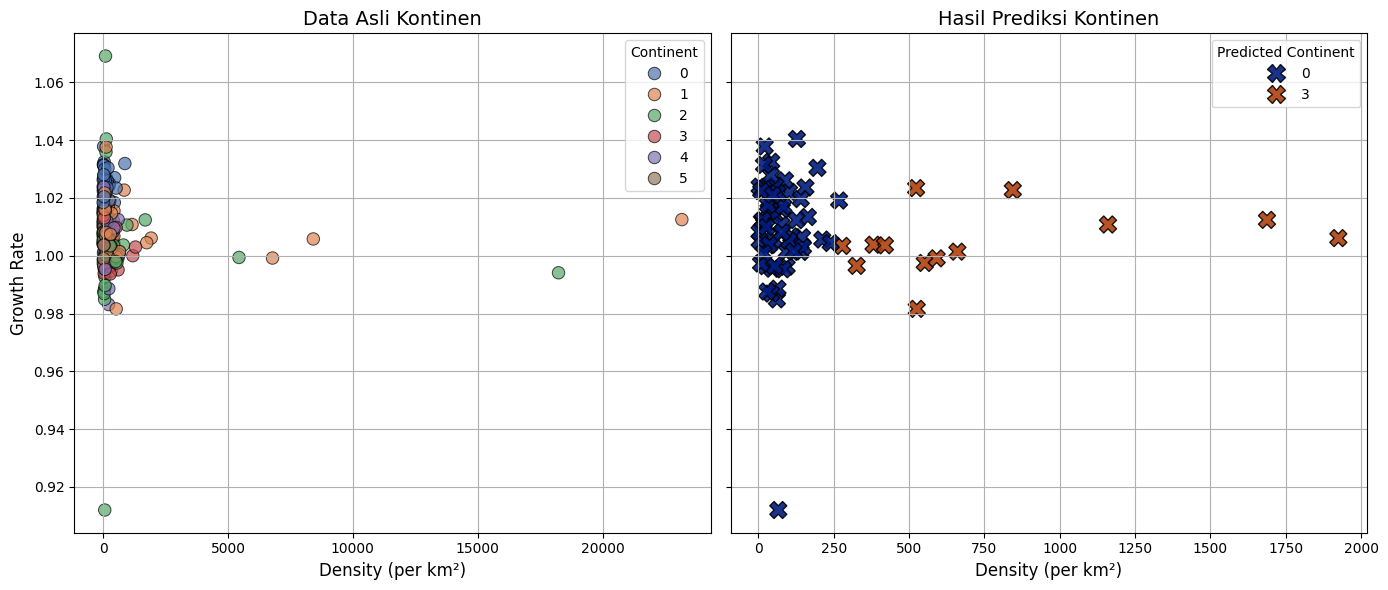

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Menggunakan LabelEncoder untuk mendapatkan label asli
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(wp['Continent'])

# Mengubah kembali label yang diprediksi ke nama asli
predicted_labels = label_encoder.inverse_transform(y_pred)
predicted_df = pd.DataFrame({
    'Density (per km²)': X_test['Density (per km²)'].values,
    'Growth Rate': X_test['Growth Rate'].values,
    'Predicted Continent': predicted_labels
})

# Membuat subplot (2 kolom)
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Subplot pertama untuk data asli
sns.scatterplot(x='Density (per km²)', y='Growth Rate', hue='Continent',
                data=wp, s=80, alpha=0.7, palette='deep', edgecolor='black', ax=axes[0])
axes[0].set_title('Data Asli Kontinen', fontsize=14)
axes[0].set_xlabel('Density (per km²)', fontsize=12)
axes[0].set_ylabel('Growth Rate', fontsize=12)
axes[0].grid(True)

# Subplot kedua untuk hasil prediksi
sns.scatterplot(x='Density (per km²)', y='Growth Rate', hue='Predicted Continent',
                data=predicted_df, style='Predicted Continent', markers=['X'],
                s=150, alpha=0.9, palette="dark", edgecolor='black', ax=axes[1])
axes[1].set_title('Hasil Prediksi Kontinen', fontsize=14)
axes[1].set_xlabel('Density (per km²)', fontsize=12)
axes[1].grid(True)

# Menyesuaikan layout
plt.tight_layout()
plt.show()


### **Subplot Kiri: Data Asli Kontinen**
Plot ini menunjukkan data asli dari berbagai negara berdasarkan density (per km²) dan growth rate di setiap benua. Warna berbeda merepresentasikan benua yang berbeda (kontinen). Sebagian besar data terkonsentrasi pada nilai density yang sangat rendah.


### **Subplot Kanan: Hasil Prediksi Kontinen**
Plot ini menunjukkan hasil prediksi benua menggunakan Support Vector Machine (SVM). Tanda X digunakan untuk hasil prediksi, dan warnanya menunjukkan kategori benua yang diprediksi.
